In [ ]:
"""def softmax(z):

    Compute softmax probabilities from logits.
    prevent numerical instability by subtracting the maximum value from z before exponentiating.
    Parameters:
    z (np.ndarray): Input logits, shape (n_samples, n_classes).

    Returns:
    np.ndarray: Softmax probabilities, shape (n_samples, n_classes).

    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
"""


'def softmax(z):\n    \n    Compute softmax probabilities from logits.\n    prevent numerical instability by subtracting the maximum value from z before exponentiating.\n    Parameters:\n    z (np.ndarray): Input logits, shape (n_samples, n_classes).\n\n    Returns:\n    np.ndarray: Softmax probabilities, shape (n_samples, n_classes).\n  \n    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability\n    return exp_z / np.sum(exp_z, axis=1, keepdims=True)\n'

In [ ]:

def test_softmax():
    """
    Perform basic assertion tests on the softmax function to validate its correctness.

    Tests:
    - Ensure that the output probabilities sum to 1 for each row.
    - Ensure non-negative values (all probabilities should be >= 0).
    - Test on edge cases (e.g., all zeros, very large or small values).
    """
    # Test input
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        # Check that probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"

        # Check non-negativity
        assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"

        print("Passed.")

    print("All tests passed for softmax function.")
# Run the test
test_softmax()


Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


In [ ]:
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).

    Returns:
    float: Cross-entropy loss for the observation.
    """
    # Add epsilon to prevent log(0) and calculate cross-entropy loss
    return -np.sum(y_true * np.log(y_pred + 1e-10))  # Add small epsilon for numerical stability




In [ ]:
def test_loss_softmax():
    """
    Test the loss_softmax function using a known input and output.
    """
    # Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.1, 0.8, 0.1])  # Predicted probabilities
    expected_loss = -np.log(0.8)  # Expected loss for perfect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.3, 0.4, 0.3])  # Predicted probabilities
    expected_loss = -np.log(0.3)  # Expected loss for incorrect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

    # Test Case 3: Edge case with near-zero probability
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.01, 0.98, 0.01])  # Predicted probabilities
    expected_loss = -np.log(0.98)  # Expected loss for edge case
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"

    print("All test cases passed!")
# Run the test
test_loss_softmax()


All test cases passed!


In [ ]:


#Implementation of Cost Function(Average Loss)
import numpy as np
def cost_softmax(X, y, W, b):
  """
  Compute the average cross-entropy cost over all samples

  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d)
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n,c)
  W (numpy.ndarray): Weight matrix of shape (d,c)
  b (numpy.ndarray): Bias vector of shape (c,)

  Returns:
  float: Average cross-entropy cost over all samples.
  """
  n,d = X.shape
  z = np.dot(X,W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n



In [ ]:


def test_cost_softmax():
    """
    Test the cost_softmax function using a known input and output.
    """
    # Test Case 1: Small dataset with perfect predictions
    X = np.array([[1, 2], [2, 3], [3, 4]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.array([[1, -1], [-1, 1]])  # Weight matrix (d=2, c=2)
    b = np.array([0, 0])  # Bias vector (c=2)

    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities

    # Compute expected cost using cross-entropy loss
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Adding a small epsilon for stability

    # Assert that the computed cost matches the expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

    # Test Case 2: All-zero weights and bias
    X = np.array([[1, 0], [0, 1], [1, 1]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.zeros((2, 2))  # Zero weight matrix
    b = np.zeros(2)  # Zero bias vector

    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities (uniform distribution)

    # Compute expected cost using cross-entropy loss
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Adding a small epsilon for stability

    # Assert that the computed cost matches the expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"

    # If both assertions pass
    print("All test cases passed!")

# Run the test
test_cost_softmax()


All test cases passed!


In [ ]:
import numpy as np

def softmax(z):
    """
    Compute softmax probabilities from logits.

    Parameters:
    z (np.ndarray): Input logits, shape (n_samples, n_classes).

    Returns:
    np.ndarray: Softmax probabilities, shape (n_samples, n_classes).
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


def test_compute_gradient_softmax():
    """
    Test the compute_gradient_softmax function using known input and output.
    """
    # Define simple inputs
    X = np.array([[1, 2], [3, 4]])  # Shape (2, 2)
    y = np.array([[1, 0], [0, 1]])  # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2], [0.3, 0.4]])  # Shape (2, 2)
    b = np.array([0.01, 0.02])  # Shape (2,)

    # Expected gradients (calculated manually or using a reference implementation)
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    # Compute gradients using the function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"

    print("All tests passed for compute_gradient_softmax!")


# Run the test
test_compute_gradient_softmax()


All tests passed for compute_gradient_softmax!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Cost function (Cross-Entropy Loss)
# Calculate train and test costs using negative log-likelihood
def cost_softmax(X, y, W, b):
    """Compute softmax cost."""
    logits = np.dot(X, W) + b
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    log_probs = np.log(probs + 1e-10)
    cost = -np.sum(y * log_probs) / X.shape[0]
    return cost


In [ ]:

# Gradient computation
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b



In [ ]:

# A simple assertion test for compute_gradient function
def test_compute_gradient_softmax():
  # define simple inputs
  X = np.array([[1,2], [3,4]]) #shape (2,,2)
  y = np.array([[1,0], [0,1]]) #shape (2,2), one-hot encoded
  W = np.array([[0.1, 0.2], [0.3, 0.4]]) #shape (2,2)
  b = np.array([0.01, 0.02]) #shape (2,)
  # expected gradients (calculated manually or using a reference implementation)
  z = np.dot(X,W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]
  # compute gradients using the function
  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
  # assertions
  assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match excted values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
  #atol=1e-6: value for absolute tolerance

  print("All tests passed for compute_gradient_softmax!")
# Run the test
test_compute_gradient_softmax()


All tests passed for compute_gradient_softmax!


In [ ]:
#4.2. Gradient Descent for Softmax Regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  """
  Perform gradient descent to optimize the weights and biases.

  Parameters
  X (numpy.ndarray): Feature matrix of shape (n, d)
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n,c)
  W (numpy.ndarray): Weight matrix of shape (d,c)
  b (numpy.ndarray): Bias vector of shape (c,)
  alpha (float): Learning rate
  n_iter (int): Number of iterations
  show_cost (bool): Whether to display the cost at intervals

  Returns:
  tuple: Optimized weights, biases, and cost history
  """
  cost_history =[]
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)
    # if show_cost and (i % 100 == 0 or i == n_iter - 1):
    #   print(f"Iteration {i}: Cost = {cost:.6f}")
  return W, b, cost_history


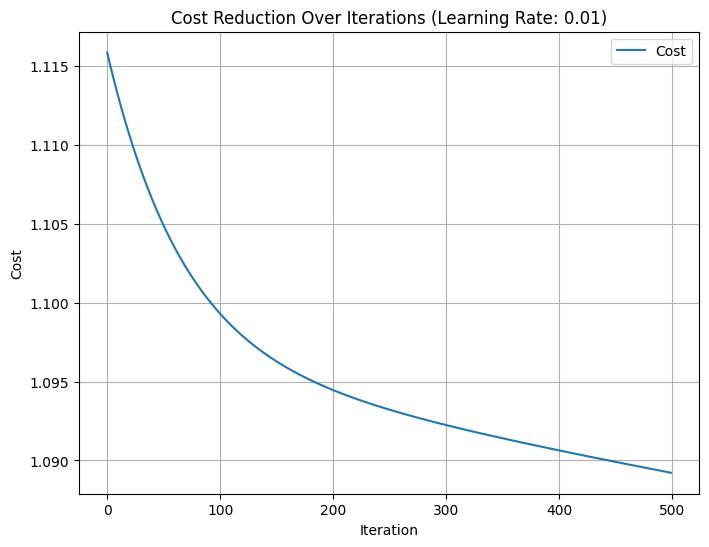

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [ ]:

# Test Gradient Descent with Synthetic Data and Plot the Cost vs Iterations
def test_gradient_descent_softmax_with_plot():
    """
    Test gradient descent on synthetic data and plot the cost over iterations.
    """
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 100, 5, 3  # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Parameters for gradient descent
    alpha = 0.01  # Learning rate
    n_iter = 500  # Number of iterations

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

    # Plot the cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
    plt.legend()
    plt.grid()
    plt.show()

    # Final cost should ideally be less than initial cost
    print(f"Initial Cost: {cost_history[0]}")
    print(f"Final Cost: {cost_history[-1]}")

# Run the test
test_gradient_descent_softmax_with_plot()


In [ ]:
import numpy as np

# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return np.argmax(y_pred, axis=1)


In [ ]:
# Test function for predict_softmax
def test_predict_softmax():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 10, 5, 3  # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Compute the predictions using the function
    predictions = predict_softmax(X, W, b)

    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

    # Verify that all predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (
        f"Predictions out of range: expected 0 to {c-1}, got {predictions}"
    )

    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"

    print("All tests passed for predict_softmax!")
#run the test
test_predict_softmax()


All tests passed for predict_softmax!


In [ ]:

def evaluate_classsification(y_true, y_pred):
  """
  Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.

  Confusion matrix: shows the performance of the classification model. It is a table with
  actual values(y_true) against predicted values(y_pred). It shows how many times each
  class was correctly or incorrectly predicted.

  Precision: proportion of true positive predictions out of al positive predictions made
  by the classifier.

  Parameters:
  y_true (numpy.ndarray): True class labels of shape (n,)
  y_pred (numpy.ndarray): Predicted class labels of shape (n,)

  Returns:
  tuple: Confusion matrix, precision, recall, and F1-score
  """
  from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
  cm = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
  recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
  f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
  # average="weighted": metric is calculated individually for each class and then averaged,
  # with the average weighted by the number of samples of each class.

  #zero_division=0: if no positive predictions are made, it will return 0 instead of raising an error.

  return cm, precision, recall, f1




In [ ]:
# Load Titanic dataset
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Mount Google Drive
drive.mount("/content/drive")

# Filepath for the Titanic dataset
filepath = "/content/drive/MyDrive/sem3ai/Titanic-Dataset.csv"
df = pd.read_csv(filepath)

# Check for null values and display their count
print(df.isnull().sum())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
#Separate the feature matrix (X) and target variable (y).
x = df.drop('Embarked', axis=1)
y = df['Embarked']
print("Feature matrix (x): ")
print(x.head())

Feature matrix (x): 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin  
0      0         A/5 21171   7.2500  Unknown  
1      0          PC 17599  71.2833      C85  
2      0  STON/O2. 3101282   7.9250  Unknown  
3      0            113803  53.1000     C123  
4      0            373450   8.0500  Unknown  


In [ ]:
print("\nTarget vector (y): ")
print(y.head())


Target vector (y): 
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


In [ ]:
# display information about the dataset before cleaning
print("Dataset Info:")
x.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
#2. Constructing one hot encoding for label vector
# apply onehotencoder to label vector
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1,1))
print(y_onehot)

# apply onehotencoder to categorical columns in feature matrix
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin']
encoder = OneHotEncoder(sparse_output=False)
x_onehot = encoder.fit_transform(x[categorical_cols])

# convert the encoded features back to a dataframe
x_onehot_df = pd.DataFrame(x_onehot, columns=encoder.get_feature_names_out(categorical_cols))

# concatenate the onehotencoded columns with the original numeric columns
x_numeric = x.select_dtypes(include=['float64', 'int64']) #select only numeric columns
x_combined = pd.concat([x_numeric, x_onehot_df], axis=1)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
#Train test split and tsandard scaling of the data

# split the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_onehot, test_size=0.2, random_state=42, stratify=y)
# stratify=y: ensures that the proportion of each class label in the target variable is maintained in both taining and test sets.

# initialize the scalar and scale the data
scaler = StandardScaler()
# standardizes numerical features by sacling then to have mean=0 and standard deviation=1
x_train_scaled = scaler.fit_transform(x_train)
# fit: calculates the mean and S.D of each feature from the x_train dataset
# transform applies the standardization formula to x_train
x_test_scaled = scaler.transform(x_test)
# transformed using the mean and S.D. from the training daat
# this avoids data leakage, ensuring the test set remains unseen during training

# assertions to check the shape of x_train_scaled and x_test_scaled
assert x_train_scaled.shape == (x_train.shape[0], x_train.shape[1]), f"x_train_scaled shape mismatch: {x_train_scaled.shape}"
assert x_test_scaled.shape == (x_test.shape[0], x_test.shape[1]), f"x_test_scaled shape mismatch: {x_test_scaled.shape}"
print("Shape assertions passed!")

Shape assertions passed!


Training softmax regression model:


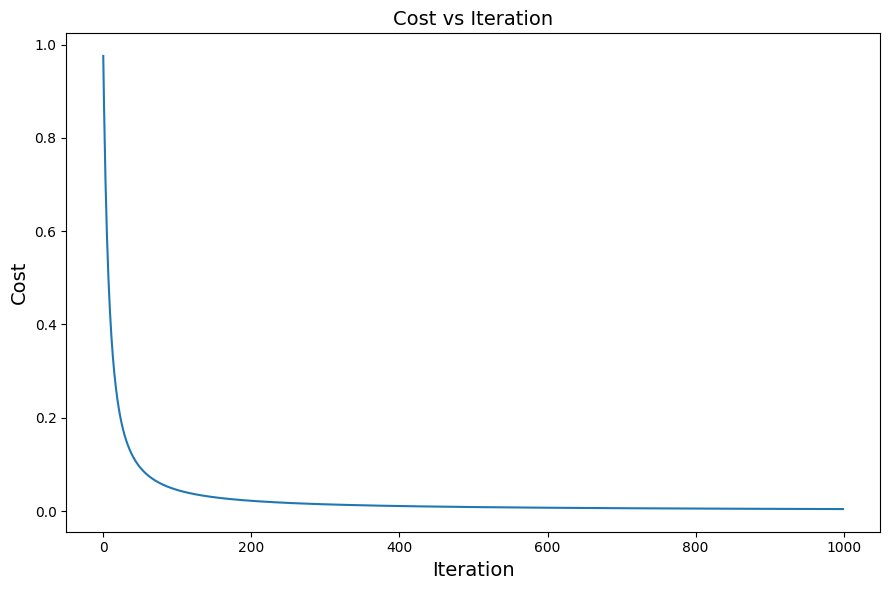

In [ ]:
#Training of the softmax regression
num_classes = y_train.shape[1] #number of classes within label vector
num_features = x_train_scaled.shape[1] #number of input features
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000

print("Training softmax regression model:")
W, b, cost_history = gradient_descent_softmax(x_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot Cost Vs. Iterations:
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#model overfit or underfit
y_train_pred = predict_softmax(x_train_scaled, W, b)
y_test_pred = predict_softmax(x_test_scaled, W, b)

# evaluate train and test performance
train_cost = cost_softmax(x_train_scaled, y_train, W, b)
test_cost = cost_softmax(x_test_scaled, y_test, W, b)
print(f"Train Loss (Cost): {train_cost:.4f}")
print(f"\nTest Loss (Cost): {test_cost:.4f}")

Train Loss (Cost): 0.0042

Test Loss (Cost): 0.5494


In [ ]:
#model fit
# converting one hot encoding into class indices
y_test_true = np.argmax(y_test, axis=1)

# accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# # evaluation
cm, precision, recall, f1 = evaluate_classsification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"\nF1-Score: {f1:.2f}")

Test Accuracy: 83.24%

Confusion Matrix:
[[ 15   0  19]
 [  0   5  10]
 [  1   0 129]]

Precision: 0.85
Recall: 0.83

F1-Score: 0.81
